<a href="https://colab.research.google.com/github/Alam710/Deep-Learning-and-Its-Applications/blob/main/Proyek_Pertama_Membuat_Model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Islam Nur Alam
Phone : 081335154133
Gmail : alamandara7@gmail.com
Alamat : Oro-oro Ombo Kota Batu Jawa Timur **teks tebal**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [4]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru

,category,text,business,entertainment,politics,sport,tech
0,tech,tv future in the hands of viewers with home th...,0,0,0,0,1
1,business,worldcom boss left books alone former worldc...,1,0,0,0,0
2,sport,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,sport,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,politics,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,entertainment,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,politics,how political squabbles snowball it s become c...,0,0,1,0,0


In [5]:
df_baru = df_baru.drop(columns=['category'])
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [6]:
atribut = df_baru['text'].values
label = df_baru[['business','entertainment','politics','sport','tech']].values

Lalu, bagi data untuk training dan data untuk testing.

In [7]:
from sklearn.model_selection import train_test_split
atribut_latih, atribut_test, label_latih, label_test = train_test_split(atribut, label, test_size=0.2)

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(atribut_latih)
tokenizer.fit_on_texts(atribut_test)

sekuens_latih = tokenizer.texts_to_sequences(atribut_latih)
sekuens_test = tokenizer.texts_to_sequences(atribut_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=10),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
num_epochs = 100
history = model.fit(
                    padded_latih,
                    label_latih,
                    epochs=num_epochs,
                    batch_size=16,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks]
                    )

Epoch 1/100
112/112 - 15s - loss: 1.5966 - accuracy: 0.2534 - val_loss: 1.5394 - val_accuracy: 0.3551
Epoch 2/100
112/112 - 13s - loss: 1.1121 - accuracy: 0.5169 - val_loss: 1.0211 - val_accuracy: 0.5461
Epoch 3/100
112/112 - 13s - loss: 0.5897 - accuracy: 0.7511 - val_loss: 0.7584 - val_accuracy: 0.6764
Epoch 4/100
112/112 - 13s - loss: 0.2693 - accuracy: 0.9112 - val_loss: 0.5908 - val_accuracy: 0.8045
Epoch 5/100
112/112 - 13s - loss: 0.1428 - accuracy: 0.9556 - val_loss: 0.6354 - val_accuracy: 0.8292

Akurasi telah mencapai > 90%!


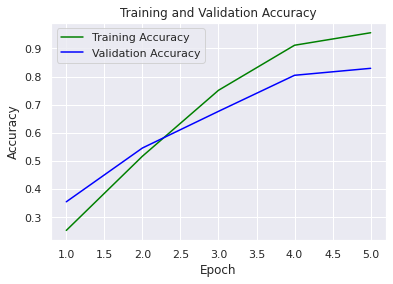

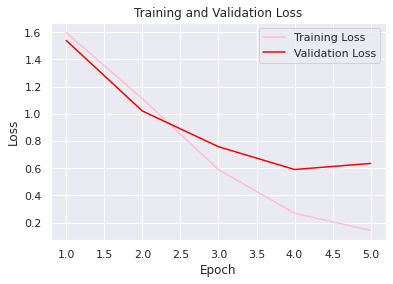

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()